In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv(r'C:\Users\kingd\Documents\mydata\steam_reviews.csv')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434891 entries, 0 to 434890
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             434891 non-null  object
 1   funny                   434891 non-null  int64 
 2   helpful                 434891 non-null  int64 
 3   hour_played             434891 non-null  int64 
 4   is_early_access_review  434891 non-null  bool  
 5   recommendation          434891 non-null  object
 6   review                  433375 non-null  object
 7   title                   434891 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 23.6+ MB


None

In [195]:
print(df.isna().sum())

date_posted                  0
funny                        0
helpful                      0
hour_played                  0
is_early_access_review       0
recommendation               0
review                    1516
title                        0
dtype: int64


In [196]:
df = df.dropna(subset=['review'])
print(df.isna().sum())
display(df.head())

date_posted               0
funny                     0
helpful                   0
hour_played               0
is_early_access_review    0
recommendation            0
review                    0
title                     0
dtype: int64


,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


([<matplotlib.axis.XTick at 0x20d9956a670>,
 [Text(0, 0, 'Not Early Access'), Text(1, 0, 'In Early Access')])

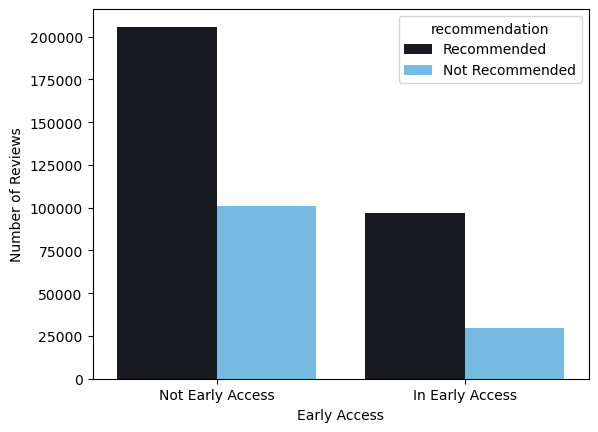

In [244]:
steam_colors = ["#171A21", "#66c0f4", "#1b2838", "#2a475e", "#c7d5e0"]
sns.set_palette(sns.color_palette(steam_colors))
sns.countplot(x="is_early_access_review", hue="recommendation", data=df)
plt.xlabel("Early Access") 
plt.ylabel("Number of Reviews") 
plt.xticks([0, 1], ["Not Early Access", "In Early Access"])
# This graph does to an extent show a relationship, but the bars don't convey it very well.

In [225]:
df['is_early_access_review'].value_counts(normalize = True)

False    0.70757
True     0.29243
Name: is_early_access_review, dtype: float64

In [226]:
df['recommendation'].value_counts(normalize = True)

Recommended        0.698589
Not Recommended    0.301411
Name: recommendation, dtype: float64

In [227]:
from scipy.stats import chi2_contingency

In [228]:
ct = pd.crosstab(df['is_early_access_review'], df['recommendation'])

In [229]:
chi2, p, dof, expected = chi2_contingency(ct)
n = ct.sum().sum()
phi = np.sqrt(chi2/n)

In [230]:
print("Chi-squared statistic: ", chi2)
print("P-value: ", p)
print("Degrees of freedom: ", dof)
print("Phi coefficient: ", phi)
print("Expected frequencies:\n", expected)

Chi-squared statistic:  3710.277468930826
P-value:  0.0
Degrees of freedom:  1
Phi coefficient:  0.09252759354478898
Expected frequencies:
 [[ 92425.57884511 214217.42115489]
 [ 38198.42115489  88533.57884511]]


In [231]:
df.dtypes

date_posted               object
funny                      int64
helpful                    int64
hour_played                int64
is_early_access_review      bool
recommendation            object
review                    object
title                     object
month                      int64
year                       int64
dtype: object

In [232]:
df['date'] = pd.to_datetime(df['date_posted'])
df.set_index('date', inplace=True)

In [233]:
df['month'] = df.index.month
df['year'] = df.index.year

In [234]:
new_df = df.groupby(['year', 'month', 'recommendation','is_early_access_review']).size().reset_index(name='count')
new_df = new_df[new_df['year'] >= 2013]
avg_year = new_df.groupby(['year','recommendation'])['count'].mean().reset_index()

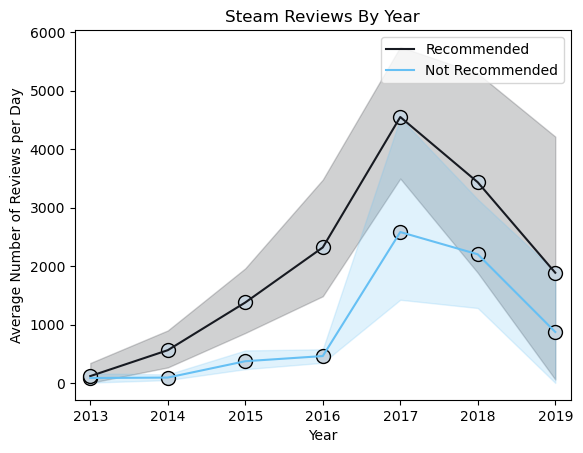

In [259]:
steam_colors = ["#171A21", "#66c0f4", "#1b2838", "#2a475e", "#c7d5e0"]
sns.set_palette(sns.color_palette(steam_colors))
sns.lineplot(data=new_df, x='year', y='count', hue='recommendation', markers=True)
sns.scatterplot(data=avg_year, x='year', y='count', color=steam_colors[4], markers='o', s=100, edgecolor='k', linewidth=1)
plt.xticks(range(2013, max(new_df['year'])+1))
plt.xlim(2012.8, max(new_df['year'])+0.20)
plt.title('Steam Reviews By Year')
plt.ylabel("Average Number of Reviews per Day") 
plt.xlabel("Year") 
plt.show()

In [236]:
df_2014 = df[df['year'] == 2014]
display(df_2014['is_early_access_review'].value_counts(normalize = True))
display(df_2014['recommendation'].value_counts(normalize = True))

True     0.970672
False    0.029328
Name: is_early_access_review, dtype: float64

Recommended        0.857306
Not Recommended    0.142694
Name: recommendation, dtype: float64

In [237]:
df_2015 = df[df['year'] == 2015]
display(df_2015['is_early_access_review'].value_counts(normalize = True))
display(df_2015['recommendation'].value_counts(normalize = True))

False    0.764721
True     0.235279
Name: is_early_access_review, dtype: float64

Recommended        0.79396
Not Recommended    0.20604
Name: recommendation, dtype: float64

In [238]:
df_2016 = df[df['year'] == 2016]
display(df_2016['is_early_access_review'].value_counts(normalize = True))
display(df_2016['recommendation'].value_counts(normalize = True))

False    0.787652
True     0.212348
Name: is_early_access_review, dtype: float64

Recommended        0.8341
Not Recommended    0.1659
Name: recommendation, dtype: float64

In [239]:
df_2017 = df[df['year'] == 2017]
display(df_2017['is_early_access_review'].value_counts(normalize = True))
display(df_2017['recommendation'].value_counts(normalize = True))

False    0.513193
True     0.486807
Name: is_early_access_review, dtype: float64

Recommended        0.637945
Not Recommended    0.362055
Name: recommendation, dtype: float64

In [240]:
df_2018 = df[df['year'] == 2018]
display(df_2018['is_early_access_review'].value_counts(normalize = True))
display(df_2018['recommendation'].value_counts(normalize = True))

False    0.980255
True     0.019745
Name: is_early_access_review, dtype: float64

Recommended        0.651718
Not Recommended    0.348282
Name: recommendation, dtype: float64

In [241]:
df_2019 = df[df['year'] == 2019]
display(df_2019['is_early_access_review'].value_counts(normalize = True))
display(df_2019['recommendation'].value_counts(normalize = True))

False    0.987894
True     0.012106
Name: is_early_access_review, dtype: float64

Recommended        0.742224
Not Recommended    0.257776
Name: recommendation, dtype: float64